In [ ]:
#  Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load cleaned data
df = pd.read_csv("../data/processed/cleaned_retail_data.csv")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,Wednesday


In [ ]:
#  Preprocess
df = df.dropna(subset=['Quantity', 'UnitPrice', 'Country'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# Ensure 'Revenue' exists
if 'Revenue' not in df.columns:
    df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Encode 'Country'
df_encoded = pd.get_dummies(df[['Quantity', 'UnitPrice', 'Country']], drop_first=True)


In [ ]:
#  Define features and target
X = df_encoded
y = df['Revenue']

# 🔀 Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#  Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
#  Evaluate Linear Regression
print("Linear Regression Results:")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression Results:
R²: 0.5228881963422178
MAE: 12.00156500183475
RMSE: 2807.4295078860746


In [ ]:
#  Train Random Forest (optional)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf))



Random Forest Results:
R²: 0.9860320477723183
MAE: 0.16934370609609364
RMSE: 82.19046552213068


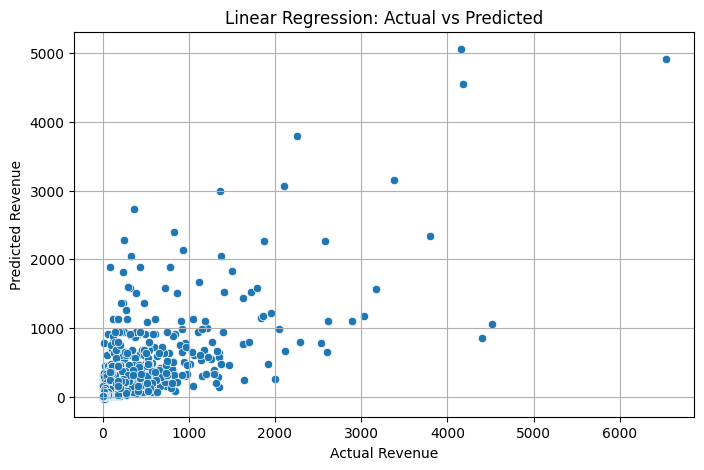

In [ ]:
#  Plot: Actual vs Predicted (Linear Regression)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()
